In [1]:
%load_ext tensorboard


from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


import numpy as np

import tensorboard
import matplotlib.pyplot as plt

import pandas
from keras.datasets import mnist

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + "regular/baseline"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


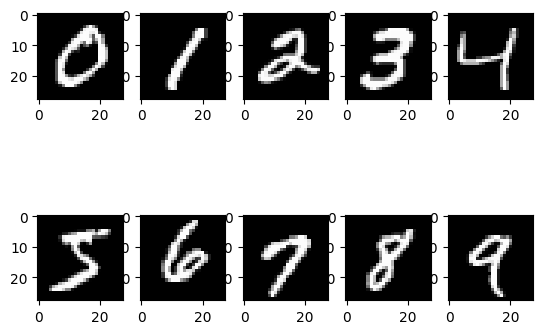

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0

# print(f"Train shape: {train_images.shape}")
# train_labels = train_labels.reshape(-1, 1)
# print(f"Test shape: {train_labels.shape}")

fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    plottable_image = np.reshape(train_images[im_idx], (28,28))
    ax[i].imshow(plottable_image, cmap='gray')

<h1>Regular CNN<h1>

<h3>Baseline<h3>

This model will serve as the baseline for all the tests of the Regular CNN 

Batch Size - 32
Learning Rate - .001
Optimizer - Adam

The data for each of these tests is stored in the logs/fit/regular/tests/[learning_rate, batch_size, or optimizer]

I will test them in the following order: Learning Rate, Batch Size, Optimizer.

Since I will be testing in this order I will apply the best learning rate as the baseline for the batch size tests and the best learning rate + batch size for the optimizer tests

If the data shows that I will need to change the learning rate for the batch size and the learning rate + batch size for the optimizers I will.

In [3]:
CNN = 'Regular'
batch_size = 32
learning_rate = .001
optimizer = 'Adam'

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])



#Compile the model
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

model.summary()



c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,890 (1.51 MB)

 Trainable params: 394,890 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:


# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print("\nRegular Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8652 - loss: 0.4137
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9798 - loss: 0.0653
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0441
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9891 - loss: 0.0349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9915 - loss: 0.0258
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 15.5214

Regular Baseline
	Test loss: 12.426109313964844
	Test accuracy: 0.9828000068664551


In [5]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 18500), started 1 day, 11:19:16 ago. (Use '!kill 18500' to kill it.)

<h2>Vary Learning Rates<h2>

In [6]:
learning_rates_arr = [.1,.01, .001, .0001, .00001]

for learning_rate in learning_rates_arr:
    CNN = 'Regular'
    batch_size = 32
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"regular/learning_rate_tests/{learning_rate}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"Regular Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0993 - loss: 5.4252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1036 - loss: 2.3144
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1006 - loss: 2.3145
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1019 - loss: 2.3136
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1016 - loss: 2.3150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0932 - loss: 5571.6948
Regular Learning Rate - 0.1
	Test loss: 5963.1240234375
	Test accuracy: 0.08869999647140503
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8737 - loss: 0.3956
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9590 - loss: 0.1533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9614 - loss: 0.1513
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9636 - loss: 0.1457
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms

<h3>Varying Batch Sizes<h3>

In [7]:
batch_sizes_arr = [8, 16, 24, 32, 64, 128]

for batch_size in batch_sizes_arr:
    CNN = 'Regular'
    learning_rate = .001
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"regular/batch_size_tests/{batch_size}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nRegular Batch Size - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9057 - loss: 0.2986
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9807 - loss: 0.0682
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9865 - loss: 0.0445
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9898 - loss: 0.0348
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9913 - loss: 0.0291
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 21.1430

Regular Batch Size - 8
	Test loss: 17.25779914855957
	Test accuracy: 0.9869999885559082
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8834 - loss: 0.3569
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9792 - loss: 0.0665
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9866 - loss: 0.0452
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9891 - loss: 0.0366
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14

<h3>Varying Optimizers<h3>

In [8]:
CNN = 'Regular'
batch_size = 32
learning_rate = .001
optimizer = 'SGD'

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
            )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"regular/optimizer_test/{optimizer}"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nRegular Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8754 - loss: 0.3907
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0663
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0420
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9900 - loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0254
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 14.2429

Regular Optimizer - SGD
	Test loss: 10.755777359008789
	Test accuracy: 0.9833999872207642


In [9]:
CNN = 'Regular'
batch_size = 32
learning_rate = .001
optimizer = 'RMSProp'

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
            )

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"regular/optimizer_test/{optimizer}"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nRegular Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8761 - loss: 0.4046
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9784 - loss: 0.0694
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0474
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0335
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9908 - loss: 0.0262
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 16.3240

Regular Optimizer - RMSProp
	Test loss: 12.524679183959961
	Test accuracy: 0.9843000173568726


In [10]:
%tensorboard --logdir logs/fit/regular

Reusing TensorBoard on port 6013 (pid 27700), started 1 day, 10:21:03 ago. (Use '!kill 27700' to kill it.)

<h1>Inverted CNN<h1>

<h3>Baseline<h3>

In [11]:
CNN = 'Inverted'
batch_size = 32
learning_rate = .001
optimizer = 'Adam'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

model.summary()

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"inverted/baseline"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])


# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nInverted Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 14, 14, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 1, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,650 (1.51 MB)

 Trainable params: 394,650 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8639 - loss: 0.4407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9801 - loss: 0.0652
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9874 - loss: 0.0436
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9897 - loss: 0.0335
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9917 - loss: 0.0269
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 11.0950

Inverted Baseline
	Test loss: 9.311927795410156
	Test accuracy: 0.9869999885559082


In [12]:
# Train the model
# model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

In [13]:
learning_rates_arr = [.1,.01, .001, .0001, .00001]

for learning_rate in learning_rates_arr:
    CNN = 'Inverted'
    batch_size = 32
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    model.summary()

    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"inverted/learning_rate_tests/{learning_rate}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nInverted Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 14, 14, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 1, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,650 (1.51 MB)

 Trainable params: 394,650 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1054 - loss: 30.1521
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.1025 - loss: 2.3147
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1029 - loss: 2.3146
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1016 - loss: 2.3131
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1049 - loss: 2.3139
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0921 - loss: 2.3296

Inverted Learning Rate - 0.1
	Test loss: 2.326894521713257
	Test accuracy: 0.0957999974489212


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 14, 14, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 1, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,650 (1.51 MB)

 Trainable params: 394,650 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8314 - loss: 0.5041
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9651 - loss: 0.1297
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9665 - loss: 0.1215
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9706 - loss: 0.1171
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9725 - loss: 0.1120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9357 - loss: 59.1160

Inverted Learning Rate - 0.01
	Test loss: 47.8563346862793
	Test accuracy: 0.9470000267028809


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 14, 14, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 1, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,650 (1.51 MB)

 Trainable params: 394,650 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8603 - loss: 0.4394
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9794 - loss: 0.0656
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9876 - loss: 0.0420
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9908 - loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9922 - loss: 0.0240
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 14.2526

Inverted Learning Rate - 0.001
	Test loss: 10.002893447875977
	Test accuracy: 0.9854999780654907


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)              │ (None, 14, 14, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 1, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,650 (1.51 MB)

 Trainable params: 394,650 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7475 - loss: 0.8693
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9442 - loss: 0.1911
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9604 - loss: 0.1343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9703 - loss: 0.1027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9748 - loss: 0.0851
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 13.3354

Inverted Learning Rate - 0.0001
	Test loss: 11.514516830444336
	Test accuracy: 0.9785000085830688


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_95 (Conv2D)              │ (None, 14, 14, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 1, 1, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,650 (1.51 MB)

 Trainable params: 394,650 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4177 - loss: 1.9963
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7971 - loss: 0.6542
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8697 - loss: 0.4539
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8967 - loss: 0.3661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9116 - loss: 0.3139
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8984 - loss: 45.5098

Inverted Learning Rate - 1e-05
	Test loss: 39.060272216796875
	Test accuracy: 0.9157999753952026


In [14]:
batch_sizes_arr = [8, 16, 24, 32, 64, 128]

for batch_size in batch_sizes_arr:
    CNN = 'Inverted'
    learning_rate = .001
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"inverted/batch_size_tests/{batch_size}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nInverted Batch Size - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.8912 - loss: 0.3413
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9793 - loss: 0.0714
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9855 - loss: 0.0484
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9894 - loss: 0.0353
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9915 - loss: 0.0285
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 13.7434

Inverted Batch Size - 8
	Test loss: 12.727373123168945
	Test accuracy: 0.9850999712944031
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8866 - loss: 0.3500
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9807 - loss: 0.0643
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9869 - loss: 0.0439
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9908 - loss: 0.0311
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 

In [15]:
CNN = 'Inverted'
batch_size = 32
learning_rate = .001
optimizer = 'SGD'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=SGD(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"inverted/optimizer_tests/SGD"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nInverted Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

CNN = 'Inverted'
batch_size = 32
learning_rate = .001
optimizer = 'RMSProp'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=RMSprop(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"inverted/optimizer_tests/RMSProp"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

print('RMSProp')

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nInverted Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1417 - loss: 2.3005
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3028 - loss: 2.2924
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3759 - loss: 2.2794
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3789 - loss: 2.2477
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2705 - loss: 2.1213
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2668 - loss: 70.7329

Inverted Optimizer - SGD
	Test loss: 72.79456329345703
	Test accuracy: 0.28060001134872437
RMSProp
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8446 - loss: 0.4925
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9799 - loss: 0.0670
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9865 - loss: 0.0429
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9903 - loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━

In [16]:
%tensorboard --logdir logs/fit/inverted

Reusing TensorBoard on port 6016 (pid 15416), started 1 day, 5:46:58 ago. (Use '!kill 15416' to kill it.)

<h1>Hourglass<h1>

<h3>Baseline<h3>

In [17]:
CNN = 'Hourglass'
batch_size = 32
learning_rate = .001
optimizer = 'Adam'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"hourglass/baseline"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nHourglass Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8981 - loss: 0.3270
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9810 - loss: 0.0614
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9882 - loss: 0.0399
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9910 - loss: 0.0301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9923 - loss: 0.0244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9839 - loss: 14.9230

Hourglass Baseline
	Test loss: 11.933812141418457
	Test accuracy: 0.9868999719619751


In [18]:
learning_rates_arr = [.1,.01, .001, .0001, .00001]

for learning_rate in learning_rates_arr:
    CNN = 'Hourglass'
    batch_size = 32
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"hourglass/learning_rate_tests/{learning_rate}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\Hourglass Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])


Epoch 1/5


<>:39: SyntaxWarning: invalid escape sequence '\H'
<>:39: SyntaxWarning: invalid escape sequence '\H'
C:\Users\adria\AppData\Local\Temp\ipykernel_21292\3645176672.py:39: SyntaxWarning: invalid escape sequence '\H'
  print(f"\Hourglass Learning Rate - {learning_rate}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.1041 - loss: 111.5985
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0998 - loss: 2.3141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1060 - loss: 2.3123
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.1047 - loss: 2.3132
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1011 - loss: 2.3138
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1399 - loss: 33485.6094
\Hourglass Learning Rate - 0.1
	Test loss: 34347.671875
	Test accuracy: 0.13529999554157257
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8223 - loss: 0.5312
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9535 - loss: 0.1651
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9564 - loss: 0.1588
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9626 - loss: 0.1376
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━

In [20]:
batch_sizes_arr = [8, 16, 24, 32, 64, 128]

for batch_size in batch_sizes_arr:
    CNN = 'Hourglass'
    learning_rate = .001
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"hourglass/batch_size_tests/{batch_size}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\Hourglass Batch Size - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/5


<>:39: SyntaxWarning: invalid escape sequence '\H'
<>:39: SyntaxWarning: invalid escape sequence '\H'
C:\Users\adria\AppData\Local\Temp\ipykernel_21292\573119365.py:39: SyntaxWarning: invalid escape sequence '\H'
  print(f"\Hourglass Batch Size - {batch_size}")


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 53s 7ms/step - accuracy: 0.9150 - loss: 0.2693
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.9805 - loss: 0.0675
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.9859 - loss: 0.0488
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.9885 - loss: 0.0394
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.9913 - loss: 0.0286
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9788 - loss: 28.2995
\Hourglass Batch Size - 8
	Test loss: 22.426366806030273
	Test accuracy: 0.9839000105857849
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.9081 - loss: 0.2907
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9809 - loss: 0.0629
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9880 - loss: 0.0407
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9913 - loss: 0.0293
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/s

In [21]:
CNN = 'Hourglass'
batch_size = 32
learning_rate = .001
optimizer = 'SGD'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=SGD(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"hourglass/optimizer_tests/SGD"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\Hourglass Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

CNN = 'Hourglass'
batch_size = 32
learning_rate = .001
optimizer = 'RMSProp'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=RMSprop(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"hourglass/optimizer_tests/RMSProp"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

print('RMSProp')

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\Hourglass Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5


<>:38: SyntaxWarning: invalid escape sequence '\H'
<>:81: SyntaxWarning: invalid escape sequence '\H'
<>:38: SyntaxWarning: invalid escape sequence '\H'
<>:81: SyntaxWarning: invalid escape sequence '\H'
C:\Users\adria\AppData\Local\Temp\ipykernel_21292\2817604212.py:38: SyntaxWarning: invalid escape sequence '\H'
  print(f"\Hourglass Optimizer - {optimizer}")
C:\Users\adria\AppData\Local\Temp\ipykernel_21292\2817604212.py:81: SyntaxWarning: invalid escape sequence '\H'
  print(f"\Hourglass Optimizer - {optimizer}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1674 - loss: 2.3012
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1111 - loss: 2.2968
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1127 - loss: 2.2918
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1368 - loss: 2.2837
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3560 - loss: 2.2658
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3680 - loss: 4.7902
\Hourglass Optimizer - SGD
	Test loss: 4.867432117462158
	Test accuracy: 0.3849000036716461
RMSProp
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8835 - loss: 0.3552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9837 - loss: 0.0590
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9891 - loss: 0.0375
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9913 - loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━

<h1>Question 2

In [22]:
# Load in the CIFAR-10 dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

print(test_labels.shape)



(10000, 1)


In [23]:
model = keras.models.Sequential()

#Layer 1 Convolution layer with 6 kernels and kernel size of 5x5
model.add(keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))

#Layer 2 Max pooling layer with a kernel of 2x2 with stride of 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Layer 3 Convolution layer with 16 kernels and kernel size of 5x5
model.add(keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'))

#Layer 4 Max pooling layer with a kernel of 2x2 with stride of 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Layer 5 Convolution layer with 120 kernels and kernel size of 5x5
model.add(keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'))

#Layer 6 Dense layer with 84 neurons
model.add(keras.layers.Dense(84, activation='relu'))

#Flatten the output of the previous layer
model.add(keras.layers.Flatten())

#Layer 7 Output Layer with 10 neurons
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

#Compile the model
model.compile(optimizer=Adam(.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_210 (Conv2D)             │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_211 (Conv2D)             │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_212 (Conv2D)             │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1, 1, 84)       │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_42 (Flatten)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=25, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print("\nLeNet Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/25


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_210" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 32, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
learning_rates_arr = [.1,.01, .001, .0025, .0001, .00001]

for learning_rate in learning_rates_arr:
    model = keras.models.Sequential([
        keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=25, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nLeNet Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

In [ ]:
batch_sizes_arr = [8, 16, 32, 64, 128]

for batch_size in batch_sizes_arr:
    model = keras.models.Sequential([
        keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(.001), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=25, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nLeNet Batch Sizes - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

In [ ]:

    learning_rate = .0006
    batch_size = 10

    model = keras.models.Sequential([
        keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    model.summary()

    # Train the model
    model.fit(
        train_images,
        train_labels, 
        epochs=25, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nLeNet Batch Sizes - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

In [ ]:
#Implementing the LeNet as a Feed Forward Neural Network
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer=Adam(learning_rate), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
            )

model.summary()

# Train the model
model.fit(
    train_images,
    train_labels, 
    epochs=25, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

score = model.evaluate(test_images, test_labels)
print(f"\nFeedForward Batch Sizes - {batch_size}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])